В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. Данные для обучения модели хранятся в файле adult.csv, который можно найти в материалах к занятию или скачать с сайта.

Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д. Подробное описание признаков и их возможные значения можно получить самостоятельно, используя функции Python3 для анализа датасета (describe, unique и т.д) или прочитать информацию по ссылке.

Задачу классификации нужно решить при помощи обучения модели логистической регрессии и модели опорных векторов.

In [ ]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов

# Получите данные и загрузите их в рабочую среду.
(Jupyter Notebook или другую)

In [ ]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Проведите первичный анализ.

In [ ]:
data = pd.read_csv('adult.csv', na_values = '?')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
data.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,46043,4.884200e+04,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [ ]:
# удалим из датасета признаки, которые не важны в задаче классификации физических лиц по уровню дохода:
# fnlwgt(непонятно что это за данные), educational-num (номер образования),
# relationship (родство), capital-gain (прирост капитала), capital-loss (расход капитала), hours-per-week (часов в неделю)
data_=data.drop(['fnlwgt', 'educational-num', 'relationship', 'capital-gain', 'capital-loss', 'hours-per-week'], axis=1)
data_.head()

,age,workclass,education,marital-status,occupation,race,gender,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Black,Male,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,White,Male,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,White,Male,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Black,Male,United-States,>50K
4,18,NaN,Some-college,Never-married,NaN,White,Female,United-States,<=50K


# Проверьте данные на пропуски.
Удалите в случае обнаружения.

In [ ]:
data_.isna().sum()

age                  0
workclass         2799
education            0
marital-status       0
occupation        2809
race                 0
gender               0
native-country     857
income               0
dtype: int64

In [ ]:
# удаляем строки с пропусками
data=data.dropna()

NameError: ignored

In [ ]:
data_1.isna().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
race              0
gender            0
native-country    0
income            0
dtype: int64

# Предложите альтернативный способ работы с пропусками

In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   education       45222 non-null  object
 3   marital-status  45222 non-null  object
 4   occupation      45222 non-null  object
 5   race            45222 non-null  object
 6   gender          45222 non-null  object
 7   native-country  45222 non-null  object
 8   income          45222 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.5+ MB


In [ ]:
100-(45222/48841)*100

7.409758194959153

В результате удаления строк с пустыми значениями, мы потеряли 7.4% выборки. Оставшихся данных должно быть достаточно для обучения модели

Проверим оставшиеся данные на корректность заполнения. Возможные значения признаков возьмём из описания к датасету.

In [ ]:
# age: continuous.
age_=data_1['age'].unique()
age_.sort()
age_

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90])

In [ ]:
# workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
data_1['workclass'].unique()
# в признаке workclass  отсутствует позиция "никогда не работал", очевидно мы её удалили при удалении пустых ячеек

array(['Private', 'Local-gov', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [ ]:
# education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
data_1['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [ ]:
# marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
data_1['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Separated',
       'Divorced', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [ ]:
# occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces
data_1['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [ ]:
# race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
data_1['race'].unique()

array(['Black', 'White', 'Other', 'Amer-Indian-Eskimo',
       'Asian-Pac-Islander'], dtype=object)

In [ ]:
# sex: Female, Male.
data_1['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
# native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
data_1['native-country'].unique()

array(['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [ ]:
print((data_['native-country'].value_counts())-(data_1['native-country'].value_counts()))


Cambodia                         2
Canada                          19
China                            9
Columbia                         3
Cuba                             5
Dominican-Republic               6
Ecuador                          2
El-Salvador                      8
England                          8
France                           2
Germany                         13
Greece                           0
Guatemala                        2
Haiti                            6
Holand-Netherlands               0
Honduras                         1
Hong                             2
Hungary                          1
India                            4
Iran                             3
Ireland                          1
Italy                            5
Jamaica                          3
Japan                            3
Laos                             2
Mexico                          48
Nicaragua                        1
Outlying-US(Guam-USVI-etc)       1
Peru                

Посмотрим, как повлияло удаление строк на целевую переменную

In [ ]:
# class: >50K, <=50K
data_1['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [ ]:
print(data_['income'].value_counts())
print('___________________________________')
print(data_1['income'].value_counts())

<=50K    37155
>50K     11687
Name: income, dtype: int64
___________________________________
<=50K    34014
>50K     11208
Name: income, dtype: int64


In [ ]:
print('класс <=50K уменьшился на', round(100-(34014/37155)*100), '%')
print('класс >50K уменьшился на', round(100-(11208/11687)*100), '%')

класс <=50K уменьшился на 8 %
класс >50K уменьшился на 4 %


In [ ]:
print(data_.groupby('income')[['workclass','occupation', 'native-country']].describe())
print('___________________________________')
print(data_1.groupby('income')[['workclass','occupation', 'native-country']].describe())

       workclass                        occupation                          \
           count unique      top   freq      count unique              top   
income                                                                       
<=50K      34621      8  Private  26519      34611     14     Adm-clerical   
>50K       11422      7  Private   7387      11422     14  Exec-managerial   

             native-country                               
        freq          count unique            top   freq  
income                                                    
<=50K   4843          36518     41  United-States  33138  
>50K    2908          11467     40  United-States  10694  
___________________________________
       workclass                        occupation                          \
           count unique      top   freq      count unique              top   
income                                                                       
<=50K      34014      7  Private  26056     

В качестве альтернативного способа работы с пропусками, можно было бы заменить NAN на "учитываемое" значение (например 'unknown') и далее провести замену пропуска значением в разрезе с другими признаками. Но выборка достаточно большая, а процент потерь на удалении строк с пропусками невелик. Считаю, что это будет оптимальным вариантом в данном случае.

# Постройте 1-2 графика на выбор.
Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

In [ ]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

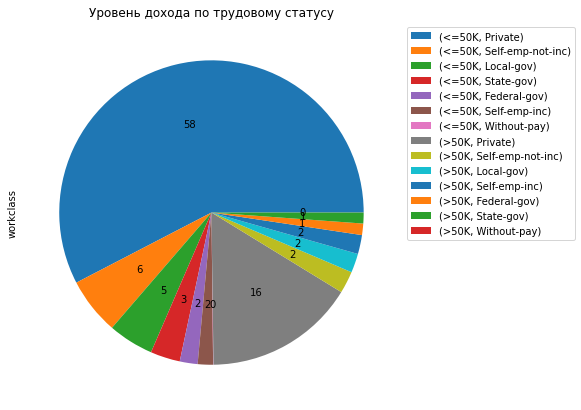

In [ ]:
data_workclass = data_1.groupby('income')['workclass'].value_counts()
data_workclass.plot(kind='pie', title='Уровень дохода по трудовому статусу', autopct='%.f', labeldistance=None)
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
import seaborn as sns

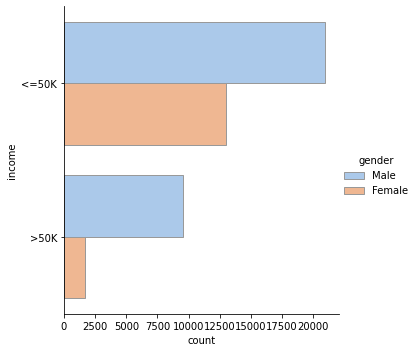

In [ ]:
sns.catplot( data=data_1, y="income", hue="gender", kind="count", palette="pastel", edgecolor=".6",)

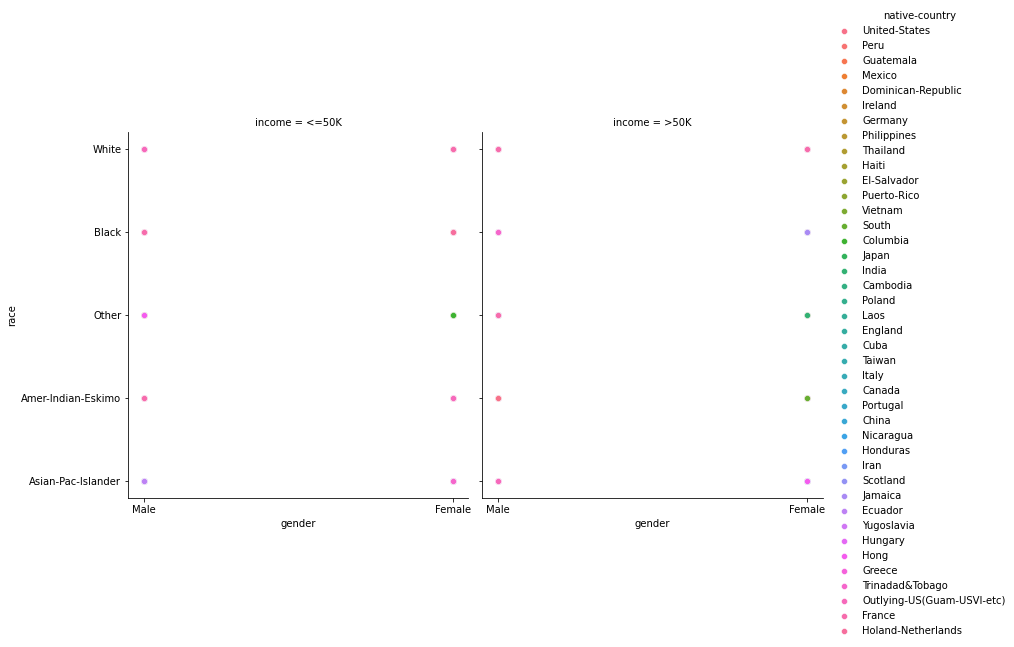

In [ ]:
g = sns.FacetGrid(data_1, col="income", hue="native-country", height=6, aspect=1)
g.map_dataframe(sns.scatterplot, x="gender", y="race")
g.add_legend()

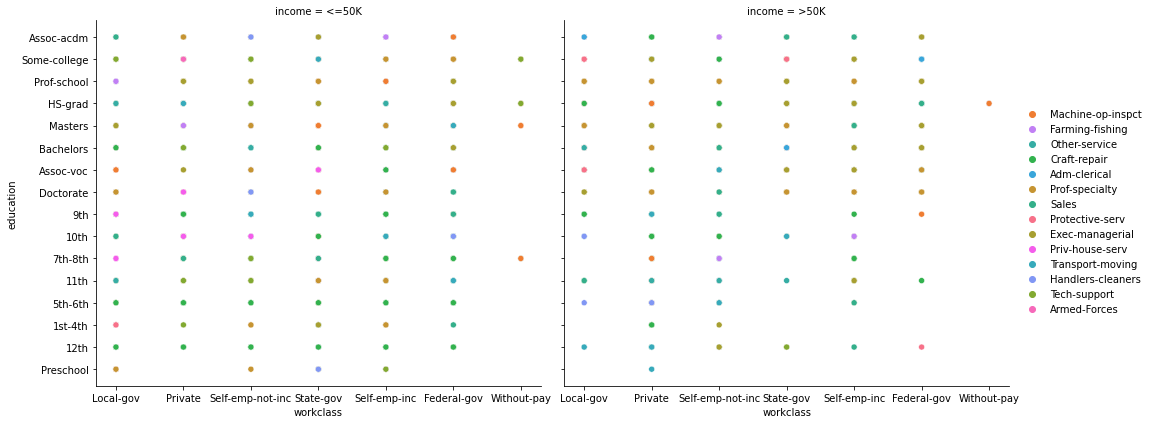

In [ ]:
g = sns.FacetGrid(data_1, col="income", height=6, aspect=1.2)
g.map_dataframe(sns.scatterplot, x="workclass", y="education", hue="occupation")
g.add_legend()

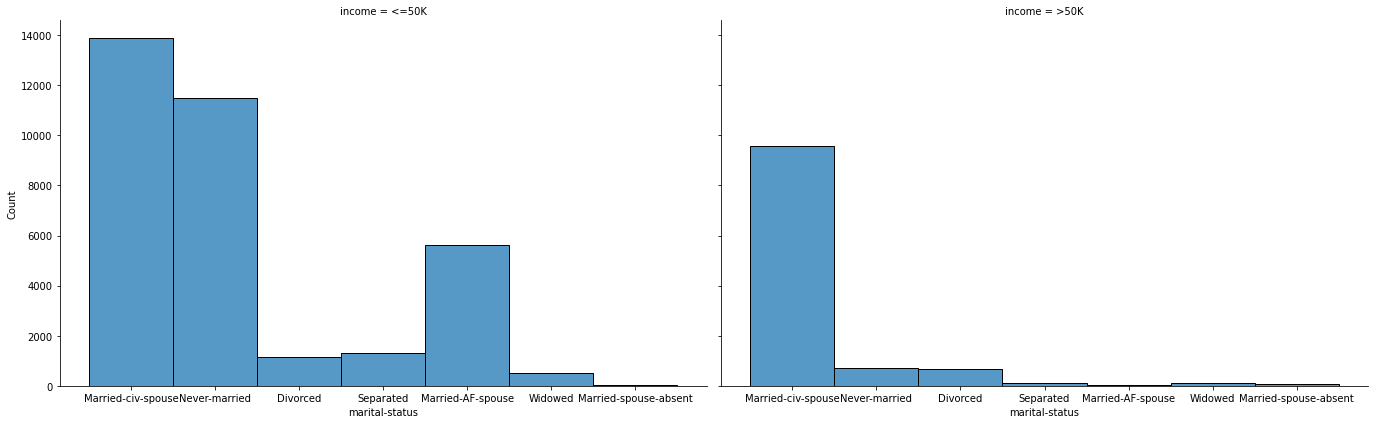

In [ ]:
g = sns.FacetGrid(data_1, col="income", height=6, aspect=1.6)
g.map(sns.histplot, "marital-status")

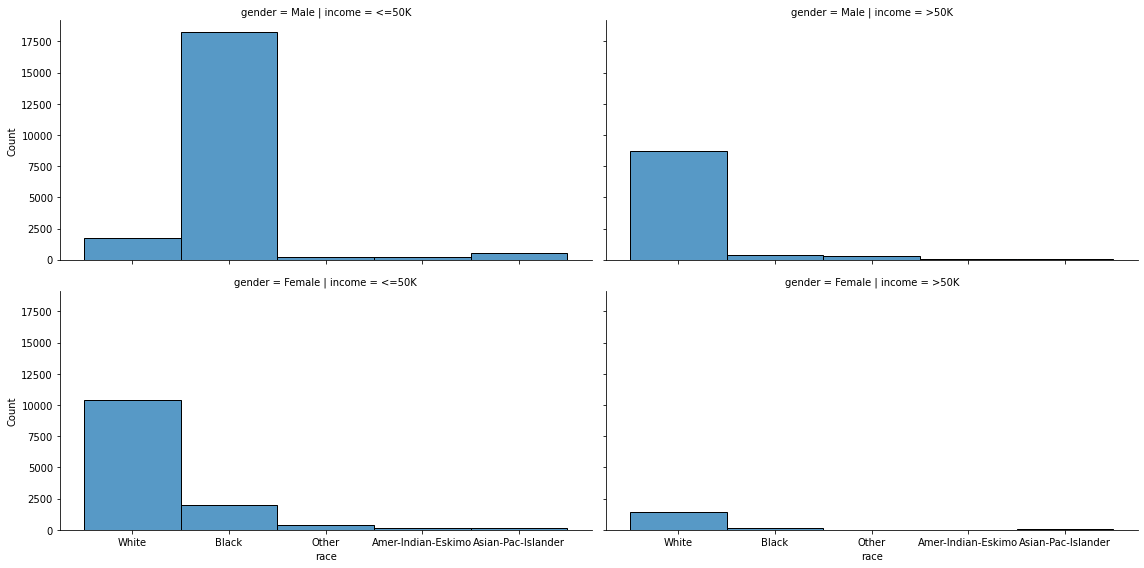

In [ ]:
g = sns.FacetGrid(data_1, col="income", row="gender", height=4, aspect=2.0)
g.map_dataframe(sns.histplot, x="race")

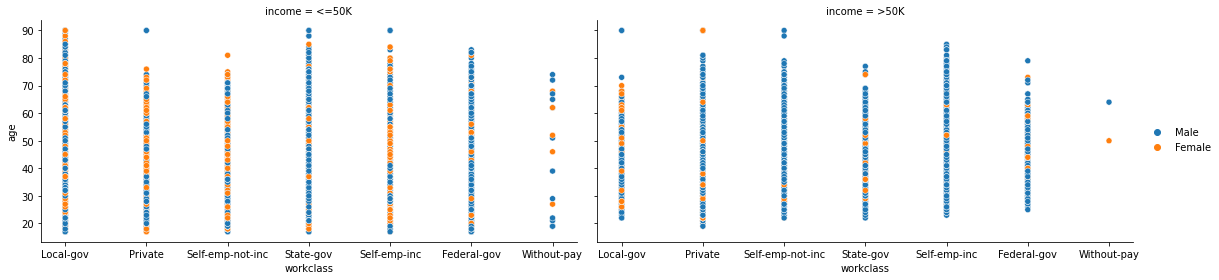

In [ ]:
g = sns.FacetGrid(data_1, col="income", height=4, aspect=2.0)
g.map_dataframe(sns.scatterplot, x="workclass", y="age", hue="gender")
g.add_legend()

# Преобразуйте категориальные признаки.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   education       45222 non-null  object
 3   marital-status  45222 non-null  object
 4   occupation      45222 non-null  object
 5   race            45222 non-null  object
 6   gender          45222 non-null  object
 7   native-country  45222 non-null  object
 8   income          45222 non-null  object
dtypes: int64(1), object(8)
memory usage: 4.5+ MB


In [ ]:
# выбираем признаки
selectedColumns = data_1 [['workclass','gender', 'income']]

In [ ]:
# столбцы с категориальными переменными переводим в значения 0 и 1, добавив столбцы с соответствующими названиями
X = pd.get_dummies (selectedColumns, columns = ['workclass','gender'])

In [ ]:
# столбец income является целевой переменной, удаляем его из Х

del X['income']

In [ ]:
print('Преобразовали категориальные признаки.')
X.head()

Преобразовали категориальные признаки.


,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,gender_Female,gender_Male
0,0,0,1,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,1
5,0,0,1,0,0,0,0,0,1


<p>LabelEncoder ставит в соответствие значению уровню дохода (целевая переменная) 0 и 1 </p>

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit( data_1['income'])

LabelEncoder()

In [ ]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [ ]:
le.transform( ['<=50K', '>50K']) # пример расшифровки

array([0, 1])

In [ ]:
le.inverse_transform([1, 0, 1])

array(['>50K', '<=50K', '>50K'], dtype=object)

In [ ]:
# записываем в таргетную переменную y преобразованный столбец income

y = pd.Series (le.transform(data_1['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

# Разделите выборку на обучающее и тестовое подмножество.
80% данных оставить на обучающее множество, 20% на тестовое.

In [ ]:
from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=100))

In [ ]:
model = LogisticRegression() # берем в качестве модели логистическую регресиию из scikit-learn

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучите модели логистической регрессии и опорных векторов на обучающем множестве.

модель логистической регрессии

In [ ]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
model.predict(X_test)
model.predict_proba(X_test)

array([[0.88260562, 0.11739438],
       [0.72111403, 0.27888597],
       [0.72111403, 0.27888597],
       ...,
       [0.72111403, 0.27888597],
       [0.68403163, 0.31596837],
       [0.72111403, 0.27888597]])

модель опорных векторов

In [ ]:
from sklearn.svm import SVC
# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

# Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей.
Для этого используйте встроенную функцию score.

модель логистической регрессии

In [ ]:
model.score(X_train, y_train)

0.7569726621886834

In [ ]:
model.score(X_test,y_test)

0.7613045881702598

модель опорных векторов

In [ ]:
clf.score(X_train, y_train)

0.7569726621886834

In [ ]:
clf.score(X_test, y_test)

0.7613045881702598

# Выводы

Точность двух моделей получилась одинаковая. Думаю, результат предсказания мог быть лучше. Для этого нужно более внимательно проанализировать данные и подобрать для обучения выборку с бОльшим набором показателей.